## 05. 학습하기
### 5-4 프로그래밍으로 해결하기
#### 5-4-1 모델 학습하기

In [48]:
import pandas as pd
df = pd.read_csv('/Users/sunghyoukchoi/Google Drive/Code_of_textbook/수학과_함께하는_AI기초/3단원_0822/3-3/temp_ice.csv', encoding='euc-kr')
print(df.head(5))

           날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)  아이스크림/빙수
0  2019-01-01     -2.1     -5.8      2.1        27
1  2019-01-02     -2.5     -7.0      3.2        27
2  2019-01-03     -2.1     -7.7      5.0        25
3  2019-01-04     -0.7     -7.3      5.3        25
4  2019-01-05      0.2     -4.6      5.3        26


In [49]:
import numpy as np
data = np.array(df)
X = data[:, 1]
Y = data[:, -1]

In [50]:
# 비용을 계산하고 업데이트 하기 -- 최소제곱법
mean_X = np.mean(X)
mean_Y = np.mean(Y)

n = len(X)

temp1 = 0
temp2 = 0

for i in range(n):
    temp1 += (X[i]-mean_X) * (Y[i]-mean_Y)
    temp2 += (X[i]-mean_X)**2

beta1 = temp1/temp2
beta0 = mean_Y - (beta1*mean_X)

print('기울기 (beta1): {0}, 절편 (beta0): {1} '.format(beta1, beta0))

기울기 (beta1): 1.3695501118896156, 절편 (beta0): 22.845160616391098 


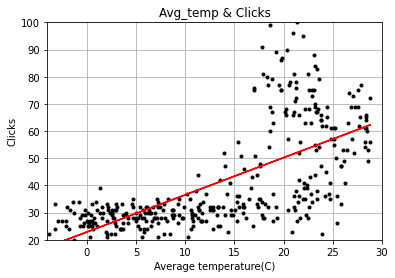

In [51]:
# 적합된 회귀선 그리기
import matplotlib.pyplot as plt
Y_pred = beta0 + beta1 * X

plt.title('Avg_temp & Clicks')
plt.xlabel('Average temperature(C)')
plt.ylabel('Clicks')

plt.plot(X, Y, 'k.')
plt.plot(X, Y_pred, color = 'red')
plt.axis([-4, 30, 20, 100])
plt.grid()
plt.show()

In [52]:
# 평가하기
def RMSE(beta0, beta1, x, y):
    RMSE = np.sqrt(((y-(beta0+beta1*x))**2).mean())
    return RMSE

results = RMSE(beta0, beta1, X, Y)
print('손실값 결과는? {0}'.format(results))

손실값 결과는? 13.932934996027768


#### 5-4-2 예측하기

In [53]:
def Regression(beta0, beta1, X):
    Y_pred = beta0 + beta1 * X
    return Y_pred

my_temp = float(input('안녕하세요, 오늘의 평균 기온을 입력해 주세요. : '))
predicted_value = Regression(beta0, beta1, my_temp)
print('아이스크림 쇼핑 클릭량은 100점을 기준으로 {0}만큼 예상됩니다.'.format(predicted_value))

아이스크림 쇼핑 클릭량은 100점을 기준으로 63.931663973079566만큼 예상됩니다.


### scikit learn으로 풀기

In [54]:
X_new = np.reshape(X, (-1, 1))
Y_new = np.reshape(Y, (-1, 1))

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_new, Y_new)

LinearRegression()

In [59]:
Y_pred_new = lr.predict([[30]])
print(Y_pred_new)

[[63.93166397]]
